In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

print("Setup successful!")




Setup successful!


In [5]:
import pandas as pd

#Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Show first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#Basic info about the dataset
df.info()

#Summary statistics(only numbers)
print("\n--- Summary statistics ---")
print(df.describe())

#Check for missing values
print("\n--- Missing values ---")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Summary statistics ---
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100

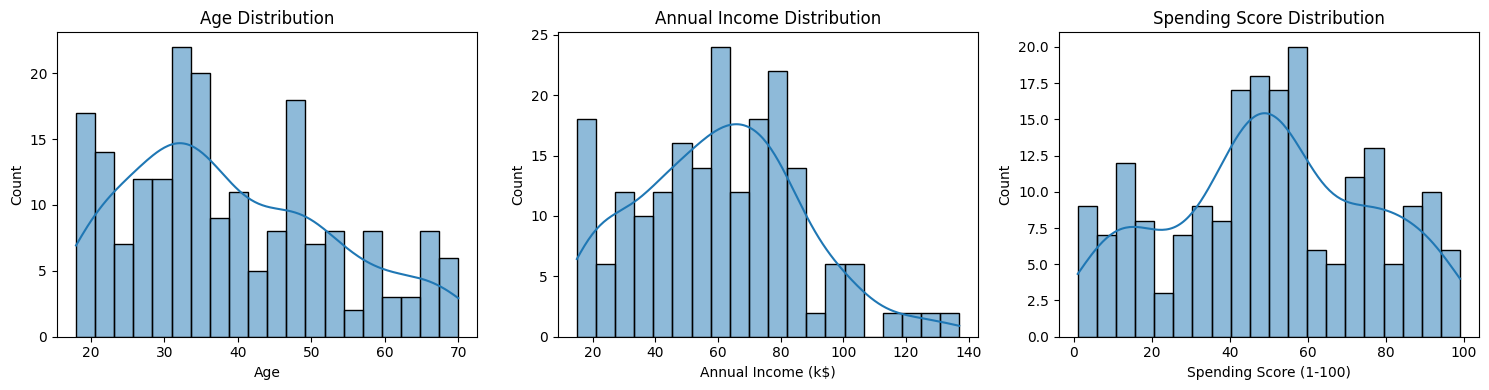

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(df["Age"], kde=True, bins=20, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["Annual Income (k$)"], kde=True, bins=20, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["Spending Score (1-100)"], kde=True, bins=20, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Select the features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Scale features (so no column dominates)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows before scaling:\n", X.head())
print("\nFirst 5 rows after scaling:\n", X_scaled[:5])


First 5 rows before scaling:
    Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

First 5 rows after scaling:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


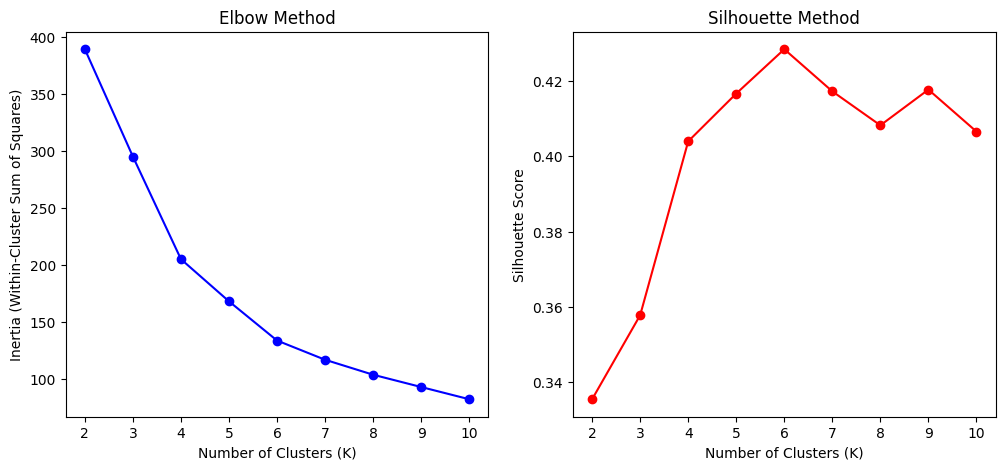

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use the scaled features
X = X_scaled

# Range of K to test
K_range = range(2, 11)

inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)  # sum of squared distances
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# --- Plot Elbow Method ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')

# --- Plot Silhouette Score ---
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.show()


Silhouette score (K=6): 0.428

Cluster centers (original units):
             Age  Annual Income (k$)  Spending Score (1-100)
Cluster 0  56.33               54.27                   49.07
Cluster 1  26.79               57.10                   48.13
Cluster 2  41.94               88.94                   16.97
Cluster 3  32.69               86.54                   82.13
Cluster 4  25.00               25.26                   77.61
Cluster 5  45.52               26.29                   19.38

Customers per cluster:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64


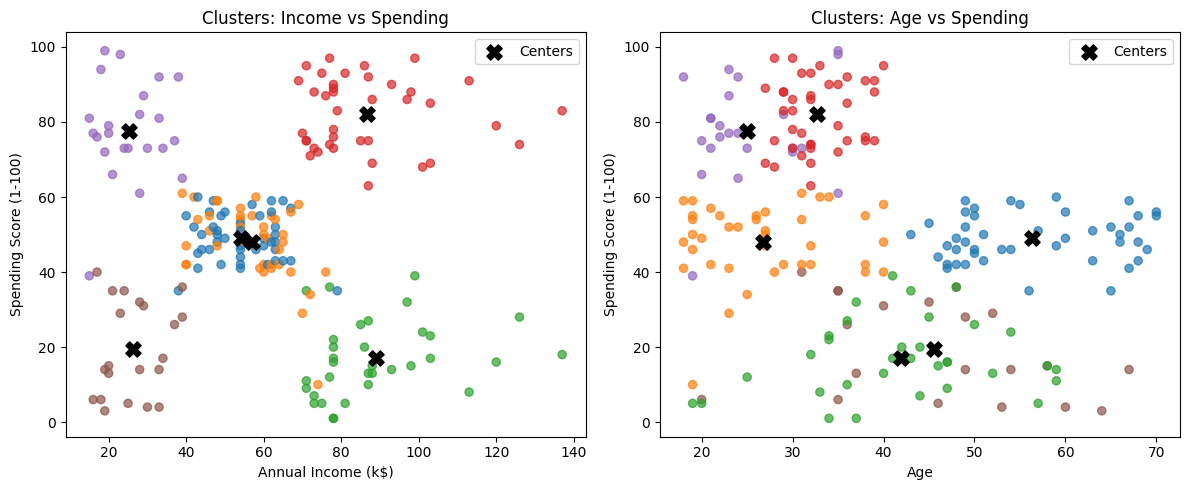

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [14]:
# STEP 15 — Train KMeans (K=6), label customers, and visualize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fit KMeans on the scaled features
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# 2) Add labels back to the original dataframe
df = df.copy()  # keep original safe
df['Cluster'] = kmeans.labels_

# 3) Silhouette score for K=6 (how cleanly separated groups are)
sil_k6 = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette score (K={k}): {sil_k6:.3f}")

# 4) Cluster centers (both scaled and original units)
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)  # back to Age/Income/Score units
centers_df = pd.DataFrame(
    centers_orig,
    columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"]
)
centers_df.index = [f"Cluster {i}" for i in range(k)]
print("\nCluster centers (original units):")
print(centers_df.round(2))

# 5) Quick counts per cluster
counts = df['Cluster'].value_counts().sort_index()
print("\nCustomers per cluster:")
print(counts)

# 6) 2D Visualizations — Income vs Spending, Age vs Spending
colors = np.array(["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b"])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=colors[df["Cluster"]], alpha=0.7, s=35)
plt.scatter(centers_df["Annual Income (k$)"], centers_df["Spending Score (1-100)"],
            c="black", s=120, marker="X", label="Centers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters: Income vs Spending")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df["Age"], df["Spending Score (1-100)"],
            c=colors[df["Cluster"]], alpha=0.7, s=35)
plt.scatter(centers_df["Age"], centers_df["Spending Score (1-100)"],
            c="black", s=120, marker="X", label="Centers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters: Age vs Spending")
plt.legend()

plt.tight_layout()
plt.show()

# 7) Peek at labeled data
df.head()


In [17]:
# Step 16 — Summarize and interpret clusters

# 1) Summary: average Age, Income, Spending + count
cluster_summary = (
    df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']]
      .mean()
      .round(1)
)
cluster_summary['Count'] = df.groupby('Cluster').size()
cluster_summary = cluster_summary.rename(columns={
    'Annual Income (k$)': 'Income_k$',
    'Spending Score (1-100)': 'Spending'
})
print("Cluster summary (averages):\n")
print(cluster_summary)

# 2) Assign plain-English names to clusters (manual interpretation)
cluster_names = {
    0: "High Income, Low Spending (Affluent Savers)",
    1: "Low Income, Low Spending (Budget Conscious)",
    2: "High Income, High Spending (Premium Big Spenders)",
    3: "Average Income, Average Spending (Mid-Level Shoppers)",
    4: "Low Income, High Spending (Value Seekers)",
    5: "Older, Low Income, Low Spending (Cautious Minimalists)"
}

# 3) Add names to dataframe
df['ClusterName'] = df['Cluster'].map(cluster_names)

# 4) Peek at final dataset
print("\nFirst few rows with Cluster Names:\n")
print(df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)','Cluster','ClusterName']].head())



Cluster summary (averages):

          Age  Income_k$  Spending  Count
Cluster                                  
0        56.3       54.3      49.1     45
1        26.8       57.1      48.1     39
2        41.9       88.9      17.0     33
3        32.7       86.5      82.1     39
4        25.0       25.3      77.6     23
5        45.5       26.3      19.4     21

First few rows with Cluster Names:

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0           1   19                  15                      39        4   
1           2   21                  15                      81        4   
2           3   20                  16                       6        5   
3           4   23                  16                      77        4   
4           5   31                  17                      40        5   

                                         ClusterName  
0          Low Income, High Spending (Value Seekers)  
1          Low Income, High Spending 

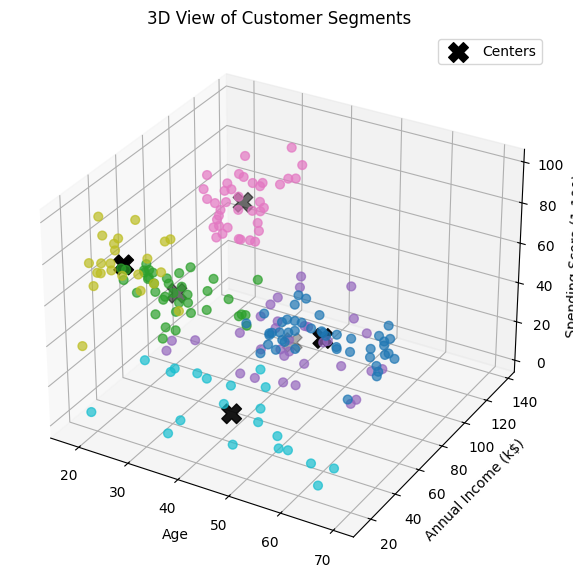

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["Age"], 
    df["Annual Income (k$)"], 
    df["Spending Score (1-100)"],
    c=df["Cluster"], 
    cmap="tab10", 
    s=40, 
    alpha=0.7
)

# Cluster centers in 3D
ax.scatter(
    centers_df["Age"], 
    centers_df["Annual Income (k$)"], 
    centers_df["Spending Score (1-100)"],
    c="black", s=200, marker="X", label="Centers"
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D View of Customer Segments")
ax.legend()
plt.show()
